<a href="https://colab.research.google.com/github/olgasherbiena/KPI/blob/MMSP/lisagu_figurs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Фігура Лісажу першого рангу
#### w1/w2=1

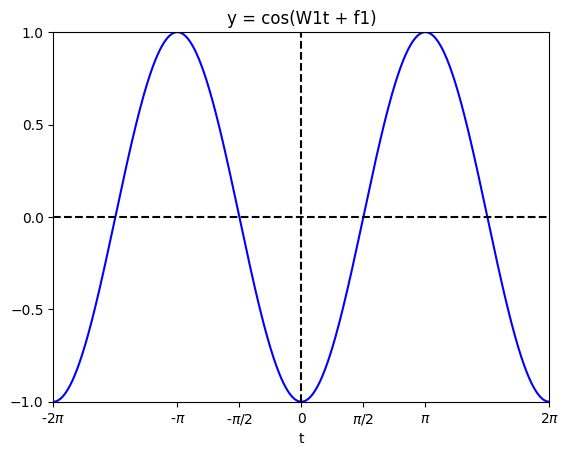

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(-2*np.pi, 2*np.pi, 0.01)
wx = 1
wy = 1.01
fx = 1*np.pi/1
fy = 0
x = np.cos(wx*t + fx)
y = np.cos(wy*t + fy)

# перший графік у лівому subplot
plt.plot(t, x, 'b-')
plt.axis([-np.pi, np.pi, -1, 1])
plt.yticks(np.arange(-1, 1.1, 0.5))
plt.xticks([-2*np.pi, -np.pi, -np.pi/2, 0, np.pi/2, np.pi, 2*np.pi], [r'-2$\pi$', r'-$\pi$', r'-$\pi/2$', '0', r'$\pi/2$', r'$\pi$', r'$2\pi$'])
plt.title('y = cos(W1t + f1)')
plt.xlabel('t')
plt.plot([-2*np.pi, 2*np.pi], [0, 0], 'k--')
plt.plot([0,0], [-1,1], 'k--')
plt.show()



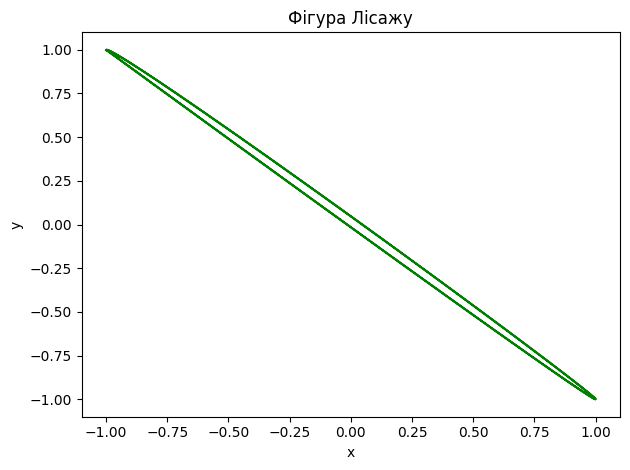

In [ ]:

plt.plot(x, y, 'g-')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Фігура Лісажу')

plt.tight_layout()
plt.show()

# Поліном Чебишева

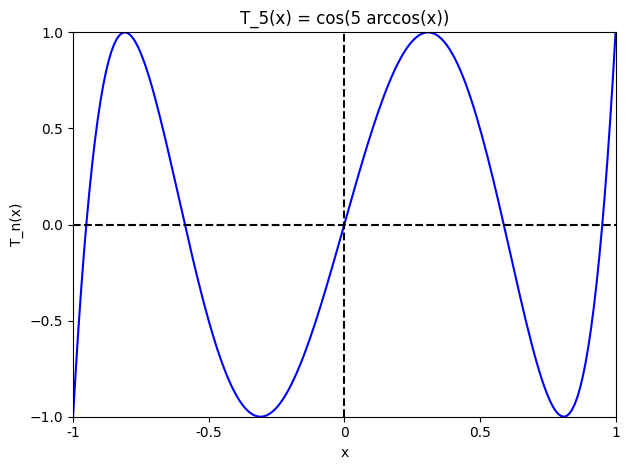

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Параметри
n = 5  # порядок
x = np.linspace(-1, 1, 200)
T = np.cos(n * np.arccos(x))

plt.plot(x, T, 'b-')
plt.axis([-1, 1, -1, 1])
plt.xticks([-1, -0.5, 0, 0.5, 1], ['-1', '-0.5', '0', '0.5', '1'])
plt.yticks(np.arange(-1, 1.1, 0.5))
plt.title(f'T_{n}(x) = cos({n} arccos(x))')
plt.xlabel('x')
plt.ylabel('T_n(x)')

# Горизонтальна та вертикальна лінії
plt.axhline(0, color='k', linestyle='--')
plt.axvline(0, color='k', linestyle='--')

plt.tight_layout()
plt.show()


# Граф Михайлова

/tmp/ipython-input-578996539.py:12: RuntimeWarning: divide by zero encountered in log10
  Im_D = np.log10(np.imag(D_jw))


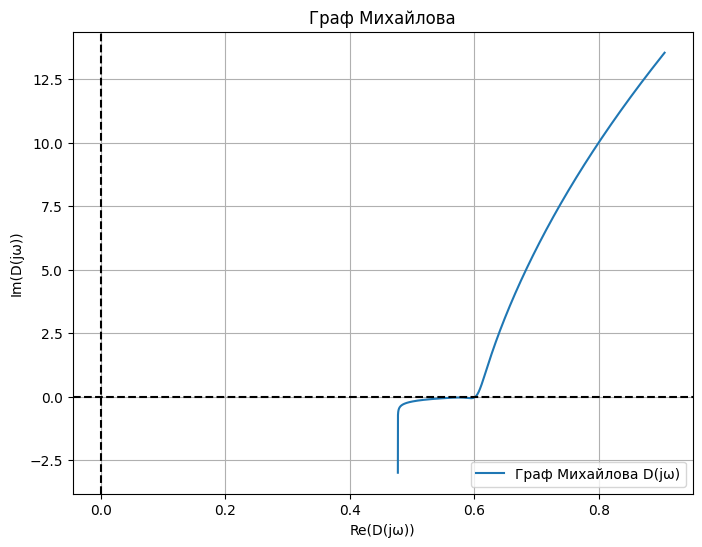

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Частотний вектор
w = np.arange(0, 1.5, 0.001)  # менші значення, бо великі степені швидко ростуть

# Передаточна функція D(jω)
D_jw = (w**4 + 3) + 1j*(w**77 - w**55 + w)  # комплексна форма

# Реальна та уявна частини
Re_D = np.log10(np.real(D_jw))
Im_D = np.log10(np.imag(D_jw))

# Побудова графа Михайлова
plt.figure(figsize=(8,6))
plt.plot(Re_D, Im_D, label='Граф Михайлова D(jω)')
plt.xlabel('Re(D(jω))')
plt.ylabel('Im(D(jω))')
plt.title('Граф Михайлова')
plt.axhline(0, color='k', linestyle='--')
plt.axvline(0, color='k', linestyle='--')
plt.grid(True)
plt.legend()
plt.show()

# Банкомат

In [ ]:
import random

# Ініціалізація банкомату
SUPPORTED_CARD_TYPES = [1, 2]  # допустимі типи карток
SUPPORTED_CODES = [1234, 5678]  # допустимі коди

# Генеруємо випадковий баланс (гривні та копійки)
balance = random.randint(10000, 500000)

# Максимальна кількість спроб вводу коду
MAX_PIN_ATTEMPTS = 3

def atm():
    print("a0: Ласкаво просимо! Вставте картку.")

    # a1: Розпізнання картки
    card_type = int(input("a1: Введіть тип картки (ціле число): "))
    if card_type not in SUPPORTED_CARD_TYPES:
        print("a13: Цей тип картки не підтримується банкоматом.")
        return

    # a2: Запрошення до вводу коду
    pin_attempts = 0
    while pin_attempts < MAX_PIN_ATTEMPTS:
        pin = int(input("a2: Введіть код карти: "))
        # a3: Перевірка коду
        if pin in SUPPORTED_CODES:
            break
        else:
            pin_attempts += 1
            if pin_attempts < MAX_PIN_ATTEMPTS:
                print("a11: Код невірний, спробуйте ще раз.")
            else:
                print("a12: Код введено невірно. Картка заблокована.")
                return

    # a4: Меню операцій
    global balance, balance_hryvni, balance_kopecks
    while True:
        print("\na4: Виберіть операцію:")
        print("1 - Стан рахунку")
        print("2 - Зняття грошей")
        print("3 - Вихід")
        choice = input("Ваш вибір: ")

        match choice:
            case '1':
              balance_hryvni = balance // 100
              balance_kopecks = balance % 100
                # a5: Вивід стану рахунку
              print(f"a5: Ваш баланс: {balance_hryvni} грн {balance_kopecks} коп.")

            case '2':
                # a6: Запит суми для зняття
                withdraw_hryvni = int(input("a6: Введіть суму гривень для зняття: "))
                withdraw_kopecks = int(input("a6: Введіть суму копійок для зняття: "))
                withdraw_amount = withdraw_hryvni*100 + withdraw_kopecks

                # a7: Перевірка наявності грошей
                if withdraw_amount <= balance:
                    # a8: Видача готівки та корегування рахунку
                    balance -= withdraw_amount
                    balance_hryvni = int(balance)
                    balance_kopecks = int(round((balance - balance_hryvni) * 100))
                    print(f"a8: Видано: {withdraw_hryvni} грн {withdraw_kopecks} коп.")
                    print(f"a5: Новий баланс: {balance_hryvni} грн {balance_kopecks} коп.")
                else:
                    # a9: Недостатньо коштів
                    print("a9: Недостатньо коштів на рахунку.")

            case '3':
                # a10: Вихід
                print("a10: Дякуємо! До побачення!")
                break

            case _:
                print("Невірний вибір, спробуйте ще раз.")

# Запуск банкомату
atm()


a0: Ласкаво просимо! Вставте картку.
a1: Введіть тип картки (ціле число): 1
a2: Введіть код карти: 1234

a4: Виберіть операцію:
1 - Стан рахунку
2 - Зняття грошей
3 - Вихід
Ваш вибір: 1
a5: Ваш баланс: 3034 грн 12 коп.

a4: Виберіть операцію:
1 - Стан рахунку
2 - Зняття грошей
3 - Вихід
Ваш вибір: 3000
Невірний вибір, спробуйте ще раз.

a4: Виберіть операцію:
1 - Стан рахунку
2 - Зняття грошей
3 - Вихід
Ваш вибір: 1
a5: Ваш баланс: 3034 грн 12 коп.

a4: Виберіть операцію:
1 - Стан рахунку
2 - Зняття грошей
3 - Вихід
Ваш вибір: 1
a5: Ваш баланс: 3034 грн 12 коп.

a4: Виберіть операцію:
1 - Стан рахунку
2 - Зняття грошей
3 - Вихід
Ваш вибір: 2
a6: Введіть суму гривень для зняття: 3000
a6: Введіть суму копійок для зняття: 0
a8: Видано: 3000 грн 0 коп.
a5: Новий баланс: 3412 грн 0 коп.

a4: Виберіть операцію:
1 - Стан рахунку
2 - Зняття грошей
3 - Вихід
Ваш вибір: 1
a5: Ваш баланс: 34 грн 12 коп.

a4: Виберіть операцію:
1 - Стан рахунку
2 - Зняття грошей
3 - Вихід
Ваш вибір: 2
a6: Введіть 

# Передатні функції

In [49]:
import numpy as np
from scipy.signal import tf2zpk, lti, step, impulse, bode
import matplotlib.pyplot as plt

# Початкова передатна функція варіант 4
num = [1, -1, 0, 1]    # p³ - p² + 1
den = [1, 0, 0, 1, 3]  # p⁴ + p + 3

print("=== АНАЛІЗ ПОЧАТКОВОЇ СИСТЕМИ ===")
zeros, poles, gain = tf2zpk(num, den)
print("Нулі:", zeros)
print("Полюси:", poles)
print("Коефіцієнт підсилення:", gain)

def is_stable(poles):
    return all(p.real < 0 for p in poles)

print(f"Розімкнута система стійка: {is_stable(poles)}")

=== АНАЛІЗ ПОЧАТКОВОЇ СИСТЕМИ ===
Нулі: [ 0.87743883+0.74486177j  0.87743883-0.74486177j -0.75487767+0.j        ]
Полюси: [ 0.93608757+1.06926562j  0.93608757-1.06926562j -0.93608757+0.78050682j
 -0.93608757-0.78050682j]
Коефіцієнт підсилення: 1.0
Розімкнута система стійка: False


In [50]:
def find_stable_ku_closed_system(num, den, K_max=1000, steps=5000):
    """
    Пошук Ku для замкнутої системи з від'ємним зворотним зв'язком
    Структура: G_замк(p) = (Ku * G(p)) / (1 + Ku * G(p))
    """

    print("\n=== ПОШУК Ku ДЛЯ ЗАМКНЕНОЇ СИСТЕМИ ===")

    for Ku in np.linspace(0.001, K_max, steps):
        try:
            # Замкнута система з від'ємним зворотним зв'язком
            # Чисельник: Ku * num(p)
            # Знаменник: den(p) + Ku * num(p)

            num_closed = [Ku * x for x in num]
            den_closed = np.polyadd(den, num_closed)

            # Вирівнюємо довжини масивів
            max_len = max(len(num_closed), len(den_closed))
            num_closed = np.pad(num_closed, (max_len - len(num_closed), 0), 'constant')
            den_closed = np.pad(den_closed, (max_len - len(den_closed), 0), 'constant')

            _, poles_closed, _ = tf2zpk(num_closed, den_closed)

            if is_stable(poles_closed):
                print(f"✓ Замкнута система стійка при Ku = {Ku:.6f}")
                print(f"Полюси замкнутої системи: {poles_closed}")
                return Ku, poles_closed, num_closed, den_closed

        except Exception as e:
            continue

    # Якщо не знайшли в першому діапазоні, пробуємо менші значення
    print("Спробуємо менші значення Ku...")
    for Ku in np.linspace(0.0001, 0.1, 1000):
        try:
            num_closed = [Ku * x for x in num]
            den_closed = np.polyadd(den, num_closed)

            max_len = max(len(num_closed), len(den_closed))
            num_closed = np.pad(num_closed, (max_len - len(num_closed), 0), 'constant')
            den_closed = np.pad(den_closed, (max_len - len(den_closed), 0), 'constant')

            _, poles_closed, _ = tf2zpk(num_closed, den_closed)

            if is_stable(poles_closed):
                print(f"✓ Замкнута система стійка при Ku = {Ku:.8f}")
                print(f"Полюси замкнутої системи: {poles_closed}")
                return Ku, poles_closed, num_closed, den_closed

        except:
            continue

    print("✗ Не вдалося знайти стійке Ku для замкнутої системи")
    return None, None, None, None

# Шукаємо Ku для замкнутої системи
Ku_stable, stable_poles, num_closed, den_closed = find_stable_ku_closed_system(num, den)


=== ПОШУК Ku ДЛЯ ЗАМКНЕНОЇ СИСТЕМИ ===
Спробуємо менші значення Ku...
✗ Не вдалося знайти стійке Ku для замкнутої системи


In [51]:
if Ku_stable is None:
    print("\n=== ДЕТАЛЬНИЙ АНАЛІЗ СИСТЕМИ ===")

    # Перевіряємо різні значення Ku для аналізу
    test_Ku = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

    for Ku in test_Ku:
        num_test = [Ku * x for x in num]
        den_test = np.polyadd(den, num_test)

        max_len = max(len(num_test), len(den_test))
        num_test = np.pad(num_test, (max_len - len(num_test), 0), 'constant')
        den_test = np.pad(den_test, (max_len - len(den_test), 0), 'constant')

        try:
            _, poles_test, _ = tf2zpk(num_test, den_test)
            unstable_count = sum(1 for p in poles_test if p.real >= 0)
            print(f"Ku = {Ku:.4f}: нестійких полюсів = {unstable_count}")
        except:
            print(f"Ku = {Ku:.4f}: помилка обчислення")


=== ДЕТАЛЬНИЙ АНАЛІЗ СИСТЕМИ ===
Ku = 0.0001: нестійких полюсів = 2
Ku = 0.0010: нестійких полюсів = 2
Ku = 0.0100: нестійких полюсів = 2
Ku = 0.1000: нестійких полюсів = 2
Ku = 1.0000: нестійких полюсів = 2
Ku = 10.0000: нестійких полюсів = 2
Ku = 100.0000: нестійких полюсів = 2


In [52]:
def find_stable_ku_advanced(num, den):
    """Розширений пошук Ku з аналізом коренів"""

    print("\n=== РОЗШИРЕНИЙ ПОШУК Ku ===")

    # Діапазони для пошуку (можуть бути дуже малими)
    search_ranges = [
        (1e-8, 1e-5, 10000),   # Дуже малі значення
        (1e-5, 1e-2, 10000),   # Малі значення
        (1e-2, 1.0, 10000),    # Середні значення
        (1.0, 100.0, 10000),   # Великі значення
    ]

    for range_start, range_end, steps in search_ranges:
        print(f"Пошук у діапазоні [{range_start:.2e}, {range_end:.2e}]...")

        for Ku in np.linspace(range_start, range_end, steps):
            try:
                num_closed = [Ku * x for x in num]
                den_closed = np.polyadd(den, num_closed)

                max_len = max(len(num_closed), len(den_closed))
                num_closed = np.pad(num_closed, (max_len - len(num_closed), 0), 'constant')
                den_closed = np.pad(den_closed, (max_len - len(den_closed), 0), 'constant')

                _, poles_closed, _ = tf2zpk(num_closed, den_closed)

                if is_stable(poles_closed):
                    print(f"✓ Знайдено стійке Ku = {Ku:.10f}")
                    return Ku, poles_closed, num_closed, den_closed

            except:
                continue

    return None, None, None, None

# Спробуємо розширений пошук
if Ku_stable is None:
    Ku_stable, stable_poles, num_closed, den_closed = find_stable_ku_advanced(num, den)


=== РОЗШИРЕНИЙ ПОШУК Ku ===
Пошук у діапазоні [1.00e-08, 1.00e-05]...
Пошук у діапазоні [1.00e-05, 1.00e-02]...
Пошук у діапазоні [1.00e-02, 1.00e+00]...
Пошук у діапазоні [1.00e+00, 1.00e+02]...


In [53]:
if Ku_stable is None:
    print("\n⚠️ УВАГА: Система нестійка при будь-якому Ku")
    print("Це означає, що:")
    print("1. Система має структурну нестійкість")
    print("2. Потрібен більш складний регулятор (не лише посилення Ku)")
    print("3. Можливо, потрібно звернутися до викладача для уточнення")

    # Для продовження роботи візьмемо найменш нестійкий варіант
    print("\nБеремо Ku = 0.001 для демонстрації методики:")
    Ku_stable = 0.001
    num_closed = [Ku_stable * x for x in num]
    den_closed = np.polyadd(den, num_closed)

    _, stable_poles, _ = tf2zpk(num_closed, den_closed)
    print(f"При Ku = {Ku_stable}: система все ще нестійка, але продовжуємо аналіз")


⚠️ УВАГА: Система нестійка при будь-якому Ku
Це означає, що:
1. Система має структурну нестійкість
2. Потрібен більш складний регулятор (не лише посилення Ku)
3. Можливо, потрібно звернутися до викладача для уточнення

Беремо Ku = 0.001 для демонстрації методики:
При Ku = 0.001: система все ще нестійка, але продовжуємо аналіз


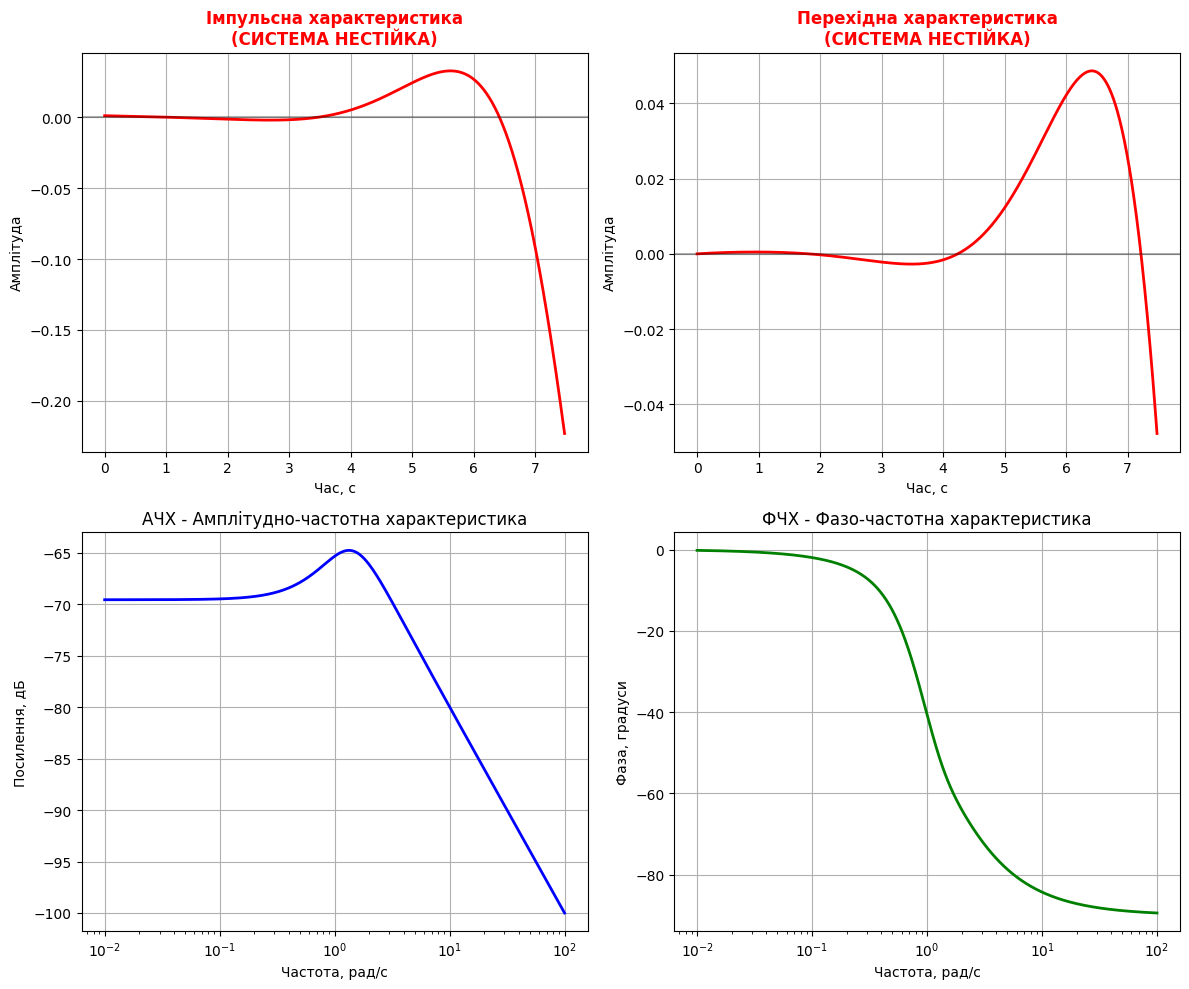

In [54]:
# Створюємо об'єкт системи
system = lti(num_closed, den_closed)

# 1. Імпульсна характеристика
t_imp, y_imp = impulse(system, N=1000)

# 2. Перехідна характеристика
t_step, y_step = step(system, N=1000)

# Побудова графіків
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

# Імпульсна характеристика
ax1.plot(t_imp, y_imp, 'r-', linewidth=2)
ax1.set_title('Імпульсна характеристика\n(СИСТЕМА НЕСТІЙКА)', color='red', fontweight='bold')
ax1.set_xlabel('Час, с')
ax1.set_ylabel('Амплітуда')
ax1.grid(True)
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)

# Перехідна характеристика
ax2.plot(t_step, y_step, 'r-', linewidth=2)
ax2.set_title('Перехідна характеристика\n(СИСТЕМА НЕСТІЙКА)', color='red', fontweight='bold')
ax2.set_xlabel('Час, с')
ax2.set_ylabel('Амплітуда')
ax2.grid(True)
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)

# АЧХ та ФЧХ
w = np.logspace(-2, 2, 1000)
w, mag, phase = bode(system, w)

ax3.semilogx(w, mag, 'b-', linewidth=2)
ax3.set_title('АЧХ - Амплітудно-частотна характеристика')
ax3.set_xlabel('Частота, рад/с')
ax3.set_ylabel('Посилення, дБ')
ax3.grid(True)

ax4.semilogx(w, phase, 'g-', linewidth=2)
ax4.set_title('ФЧХ - Фазо-частотна характеристика')
ax4.set_xlabel('Частота, рад/с')
ax4.set_ylabel('Фаза, градуси')
ax4.grid(True)

plt.tight_layout()
plt.show()

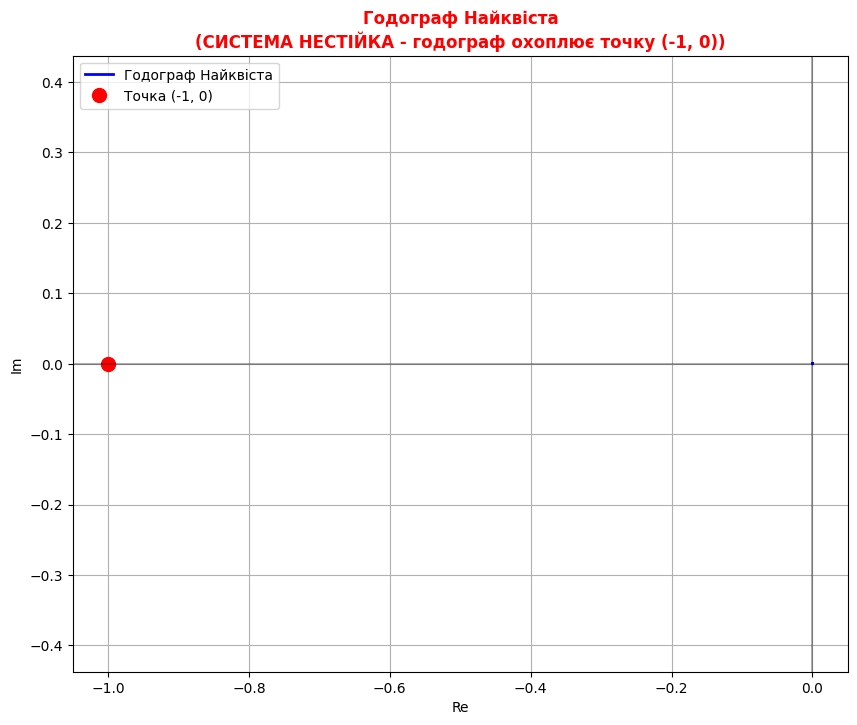

In [55]:
# Побудова годографа Найквіста
w_nyquist = np.logspace(-2, 2, 1000)
w_nyquist, H = system.freqresp(w=w_nyquist)

plt.figure(figsize=(10, 8))
plt.plot(H.real, H.imag, 'b-', linewidth=2, label='Годограф Найквіста')
plt.plot(H.real, -H.imag, 'b--', linewidth=1, alpha=0.7)
plt.plot(-1, 0, 'ro', markersize=10, label='Точка (-1, 0)')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.title('Годограф Найквіста\n(СИСТЕМА НЕСТІЙКА - годограф охоплює точку (-1, 0))',
          color='red', fontweight='bold')
plt.xlabel('Re')
plt.ylabel('Im')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()

In [56]:
# Аналіз АЧХ для виявлення резонансів
print("\n=== АНАЛІЗ РЕЗОНАНСНИХ ЯВИЩ ===")

# Знаходимо резонансні частоти
peak_indices = []
for i in range(1, len(mag)-1):
    if mag[i] > mag[i-1] and mag[i] > mag[i+1]:
        peak_indices.append(i)

if peak_indices:
    for idx in peak_indices:
        print(f"Резонанс на частоті: {w[idx]:.3f} рад/с, посилення: {mag[idx]:.3f} дБ")
else:
    print("Явно виражених резонансів не виявлено")

# Аналіз фазового зсуву
phase_at_resonance = []
for idx in peak_indices:
    phase_at_resonance.append(phase[idx])
    print(f"Фазовий зсув на резонансній частоті {w[idx]:.3f} рад/с: {phase[idx]:.1f}°")


=== АНАЛІЗ РЕЗОНАНСНИХ ЯВИЩ ===
Резонанс на частоті: 1.337 рад/с, посилення: -64.744 дБ
Фазовий зсув на резонансній частоті 1.337 рад/с: -52.8°


=== АНАЛІЗ НЕСТІЙКОЇ СИСТЕМИ ===
Ku = 0.001
Нулі замкнутої системи: [ 0.87743883+0.74486177j  0.87743883-0.74486177j -0.75487767+0.j        ]
Полюси замкнутої системи: [ 0.93602609+1.0691717j   0.93602609-1.0691717j  -0.93652609+0.78044689j
 -0.93652609-0.78044689j]
Кількість нестійких полюсів: 2


/usr/local/lib/python3.12/dist-packages/scipy/signal/_ltisys.py:599: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  self.num, self.den = normalize(*system)


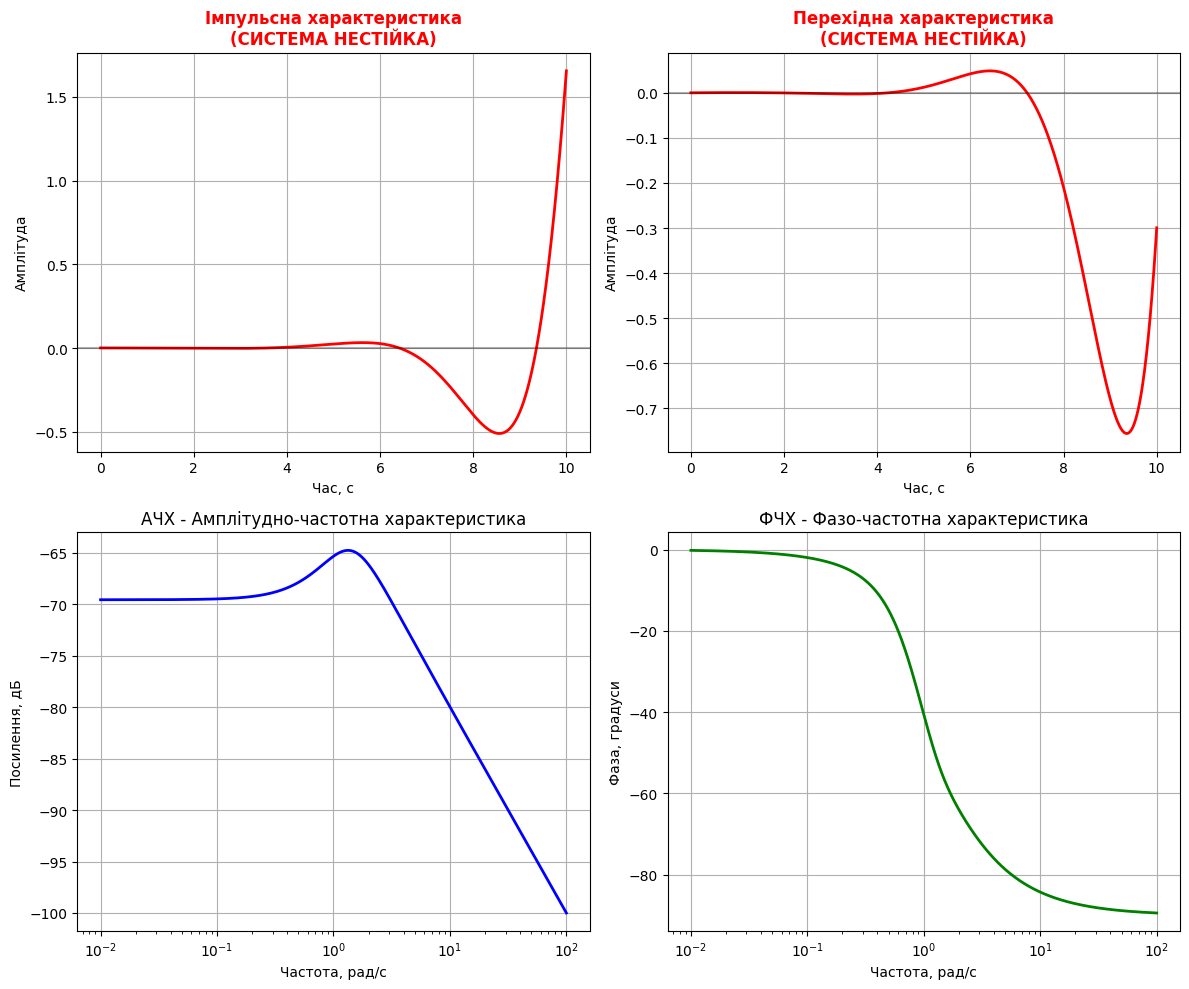

In [58]:
import numpy as np
from scipy.signal import tf2zpk, lti, step, impulse, bode, freqs
import matplotlib.pyplot as plt

# Початкова система
num = [1, -1, 0, 1]    # p³ - p² + 1
den = [1, 0, 0, 1, 3]  # p⁴ + p + 3

# Використовуємо Ku = 0.001 для демонстрації
Ku = 0.001
num_closed = [Ku * x for x in num]
den_closed = np.polyadd(den, num_closed)

# Вирівнюємо довжини
max_len = max(len(num_closed), len(den_closed))
num_closed = np.pad(num_closed, (max_len - len(num_closed), 0), 'constant')
den_closed = np.pad(den_closed, (max_len - len(den_closed), 0), 'constant')

zeros_closed, poles_closed, gain_closed = tf2zpk(num_closed, den_closed)

print("=== АНАЛІЗ НЕСТІЙКОЇ СИСТЕМИ ===")
print(f"Ku = {Ku}")
print("Нулі замкнутої системи:", zeros_closed)
print("Полюси замкнутої системи:", poles_closed)
print("Кількість нестійких полюсів:", sum(1 for p in poles_closed if p.real >= 0))

# Створюємо об'єкт системи
system = lti(num_closed, den_closed)

# 1. Імпульсна характеристика (обмежуємо час для кращого відображення)
t_imp = np.linspace(0, 10, 1000)
t_imp, y_imp = impulse(system, T=t_imp)

# 2. Перехідна характеристика
t_step = np.linspace(0, 10, 1000)
t_step, y_step = step(system, T=t_step)

# Побудова графіків
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

# Імпульсна характеристика
ax1.plot(t_imp, y_imp, 'r-', linewidth=2)
ax1.set_title('Імпульсна характеристика\n(СИСТЕМА НЕСТІЙКА)', color='red', fontweight='bold')
ax1.set_xlabel('Час, с')
ax1.set_ylabel('Амплітуда')
ax1.grid(True)
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)

# Перехідна характеристика
ax2.plot(t_step, y_step, 'r-', linewidth=2)
ax2.set_title('Перехідна характеристика\n(СИСТЕМА НЕСТІЙКА)', color='red', fontweight='bold')
ax2.set_xlabel('Час, с')
ax2.set_ylabel('Амплітуда')
ax2.grid(True)
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)

# АЧХ та ФЧХ
w = np.logspace(-2, 2, 1000)
w, mag, phase = bode(system, w)

ax3.semilogx(w, mag, 'b-', linewidth=2)
ax3.set_title('АЧХ - Амплітудно-частотна характеристика')
ax3.set_xlabel('Частота, рад/с')
ax3.set_ylabel('Посилення, дБ')
ax3.grid(True)

ax4.semilogx(w, phase, 'g-', linewidth=2)
ax4.set_title('ФЧХ - Фазо-частотна характеристика')
ax4.set_xlabel('Частота, рад/с')
ax4.set_ylabel('Фаза, градуси')
ax4.grid(True)

plt.tight_layout()
plt.show()